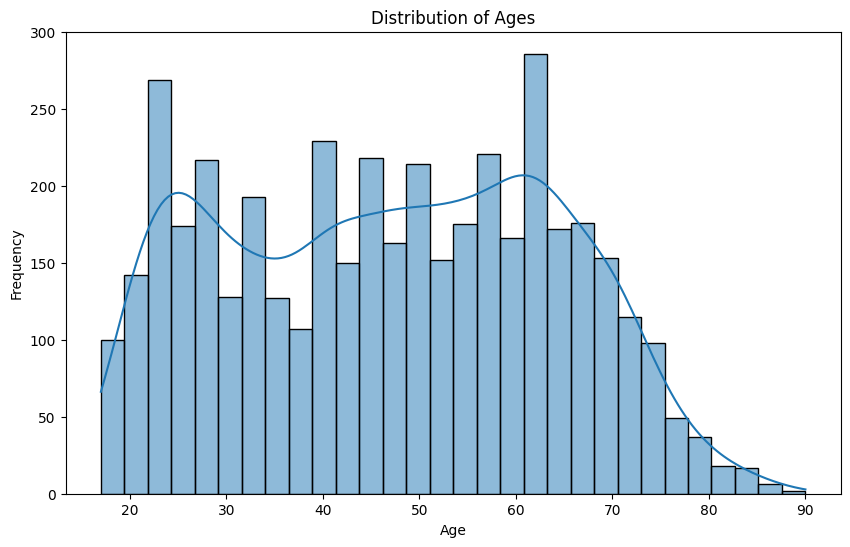

Random Forest MAE: 11.434030189070057
Random Forest R-squared: 0.3291477398360143
Gradient Boosting MAE: 11.386324716534128
Gradient Boosting R-squared: 0.3378209190675481
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 34.1500 - val_loss: 16.4693
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.6736 - val_loss: 16.4991
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 11.0235 - val_loss: 16.4504
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10.2977 - val_loss: 16.6737
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.2523 - val_loss: 16.6474
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.9994 - val_loss: 16.6726
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.5559 - val_loss: 17.0212
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.1793 - val_loss: 17.3183
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2198 - val_loss: 17.2144
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - 

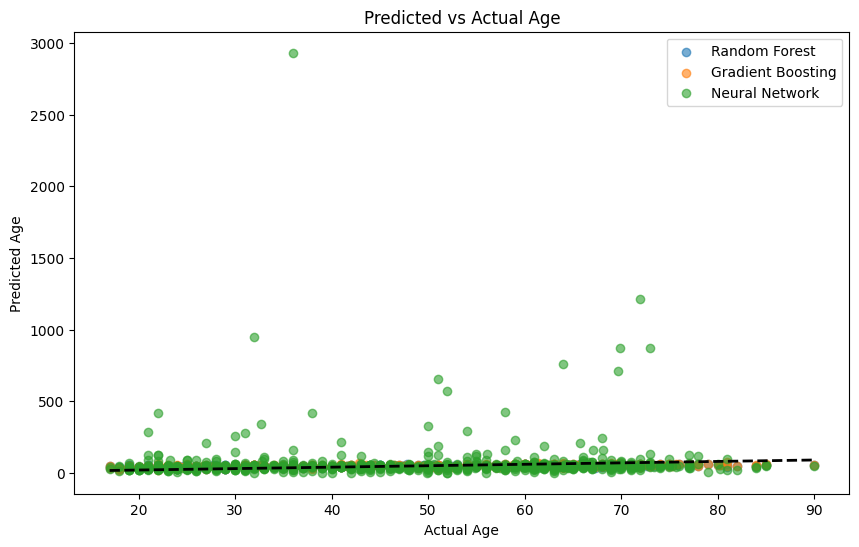

In [ ]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras import Sequential
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense

#   1-  Data Preparation   #

# Load the data
data = pd.read_csv('/data.csv')
ages = pd.read_csv('/Ages.csv')

# Merge the data and ages on the sample name
df = pd.merge(data, ages, on='Sample Accession')

# Drop sample_name as it's not needed for modeling
df.drop(columns=['Sample Accession'], inplace=True)

# Separate features and target
# Drop 'Sample Accession' column along with 'Age'
X = df.drop(columns=['Age', 'Sample Accession.1'])  # Assuming 'Sample Accession.1' is the new name after merge
y = df['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  2. Exploratory Data Analysis (EDA)  #

# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#  3. Model Training and Evaluation  #

#  3.1 Random Forest Regressor  #

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')

#  3.2 Gradient Boosting Regressor  #

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f'Gradient Boosting MAE: {gb_mae}')
print(f'Gradient Boosting R-squared: {gb_r2}')

#  3.3 Neural Network (Deep Learning Model)  #

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on test data
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluate the model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
print(f'Neural Network MAE: {nn_mae}')
print(f'Neural Network R-squared: {nn_r2}')

#  4. Results Visualization  #

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.6)
plt.scatter(y_test, gb_predictions, label='Gradient Boosting', alpha=0.6)
plt.scatter(y_test, nn_predictions, label='Neural Network', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Predicted vs Actual Age')
plt.legend()
plt.show()

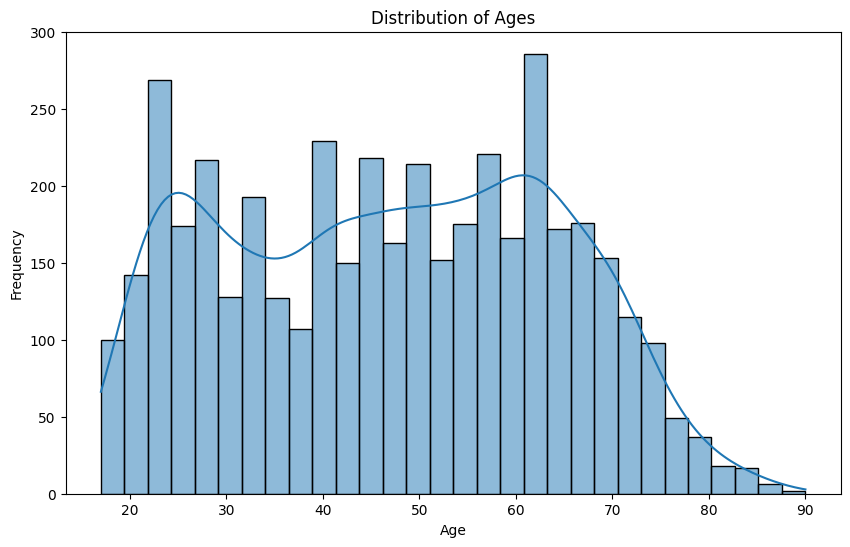

Random Forest MAE: 11.434030189070057
Random Forest R-squared: 0.3291477398360143
Gradient Boosting MAE: 11.386324716534128
Gradient Boosting R-squared: 0.3378209190675481
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 30.6000 - val_loss: 17.3689
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.4514 - val_loss: 17.0012
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12.7254 - val_loss: 16.8641
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 11.1391 - val_loss: 16.7577
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10.4607 - val_loss: 17.1051
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4434 - val_loss: 17.2574
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0309 - val_loss: 17.0259
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8503 - val_loss: 17.4411
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1793 - val_loss: 17.3540
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

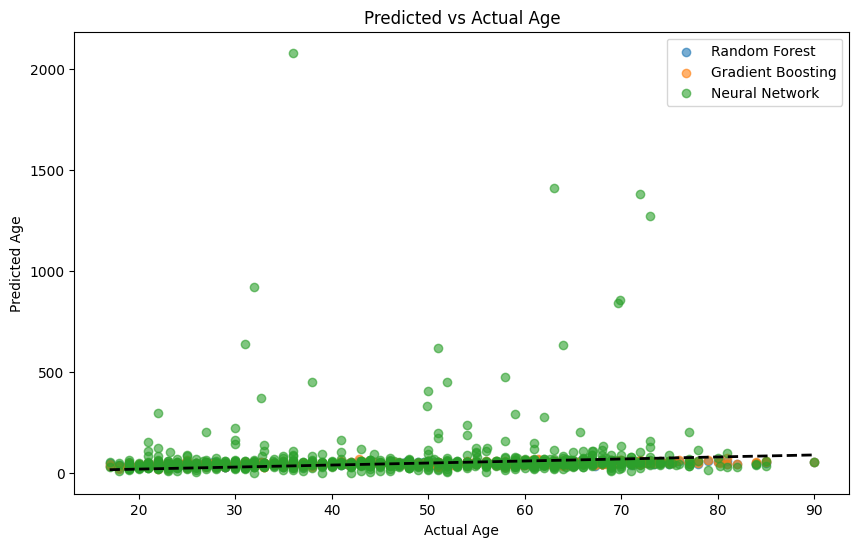

In [ ]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras import Sequential
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense

#   1-  Data Preparation   #

# Load the data
data = pd.read_csv('/data.csv')
ages = pd.read_csv('/Ages.csv')

# Merge the data and ages on the sample name
df = pd.merge(data, ages, on='Sample Accession')

# Drop sample_name as it's not needed for modeling
df.drop(columns=['Sample Accession'], inplace=True)

# Separate features and target
# Drop 'Sample Accession' column along with 'Age'
X = df.drop(columns=['Age', 'Sample Accession.1'])  # Assuming 'Sample Accession.1' is the new name after merge
y = df['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  2. Exploratory Data Analysis (EDA)  #

# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#  3. Model Training and Evaluation  #

#  3.1 Random Forest Regressor  #

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')

#  3.2 Gradient Boosting Regressor  #

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f'Gradient Boosting MAE: {gb_mae}')
print(f'Gradient Boosting R-squared: {gb_r2}')

#  3.3 Neural Network (Deep Learning Model)  #

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='rmsprop', loss='mean_absolute_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on test data
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluate the model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
print(f'Neural Network MAE: {nn_mae}')
print(f'Neural Network R-squared: {nn_r2}')

#  4. Results Visualization  #

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.6)
plt.scatter(y_test, gb_predictions, label='Gradient Boosting', alpha=0.6)
plt.scatter(y_test, nn_predictions, label='Neural Network', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Predicted vs Actual Age')
plt.legend()
plt.show()